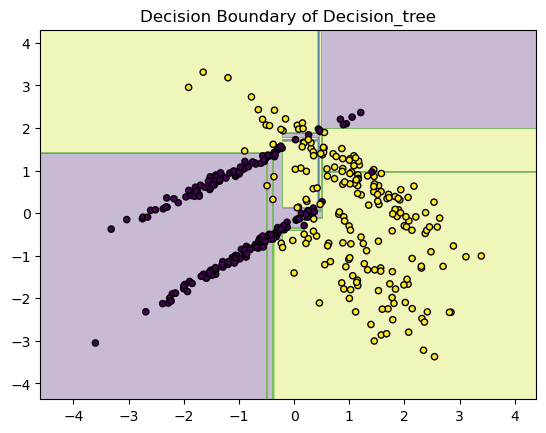

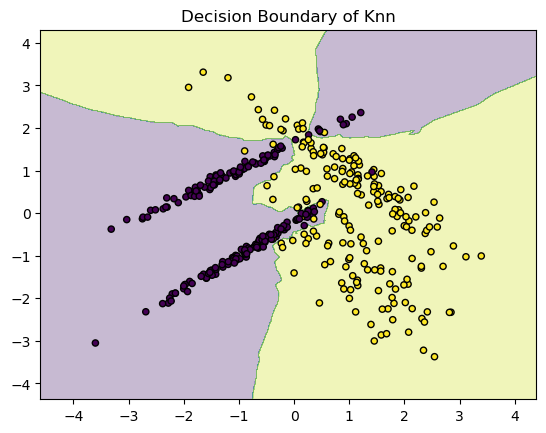

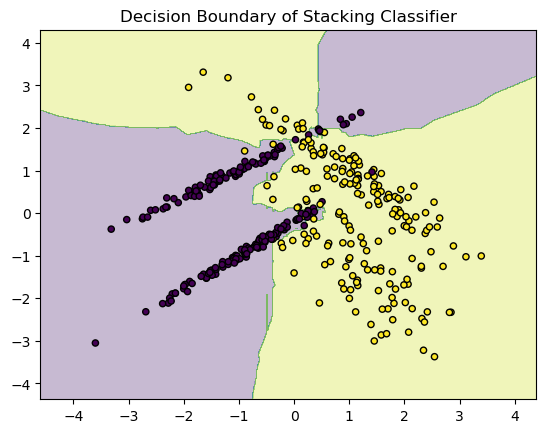

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split

# Create synthetic dataset
X, y = make_classification(n_samples=500, n_features=2, n_informative=2, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define base models
base_models = [
    ('decision_tree', DecisionTreeClassifier()),
    ('knn', KNeighborsClassifier())
]

# Define meta-model
meta_model = LogisticRegression()

# Create stacking classifier
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

# Train stacking classifier
stacking_clf.fit(X_train, y_train)

# Plot decision boundaries
def plot_decision_boundary(clf, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=20, edgecolor='k')
    plt.title(title)
    plt.show()

# Plot decision boundaries of base models
for name, model in base_models:
    model.fit(X_train, y_train)
    plot_decision_boundary(model, X_train, y_train, f'Decision Boundary of {name.capitalize()}')

# Plot decision boundary of stacking classifier
plot_decision_boundary(stacking_clf, X_train, y_train, 'Decision Boundary of Stacking Classifier')
